In [38]:
!pip install pandas
!pip install numpy
!pip install seaborn


In [59]:
#model imports
import pandas as pd
import numpy as np
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split 

#viz imports
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import plot_tree

The Model

In [3]:
df = pd.read_csv('train_dataset_preprocessed.csv')

In [5]:
#split data into features/target

x = df.drop(['Outcome', 'profit_2', 'profit_x','odds_ft_x', 'odds_ft_2'], axis=1) #dropping extra info
y = df['Outcome']

In [7]:
#train test split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


In [8]:
print(y_train.value_counts())
print(y_test.value_counts())

Outcome
0    20054
2    13888
1    12284
Name: count, dtype: int64
Outcome
0    5015
2    3473
1    3069
Name: count, dtype: int64


In [28]:
#standardized features needed for svm - alr did in preprocessing

svm = SVC(kernel='linear', C = 1.0, random_state = 42) #init model

rf = RandomForestClassifier(n_estimators=200, random_state=42)

log_reg = LogisticRegression(penalty = 'l2', multi_class='multinomial', max_iter=1000, class_weight='balanced')

gbc = GradientBoostingClassifier(
    n_estimators = 100,
    max_depth=50,
    learning_rate=0.1,
    random_state=42
)


In [33]:
#train model with train data
rf.fit(x_train, y_train)

RandomForestClassifier(n_estimators=200, random_state=42)

In [34]:
#predictions on test
preds = rf.predict(x_test)

In [35]:
#evaluate the predictions

acc = accuracy_score(preds, y_test)
cm = confusion_matrix(preds, y_test)
class_report = classification_report(preds, y_test)

Visualizing Model + Evaluation Metrics

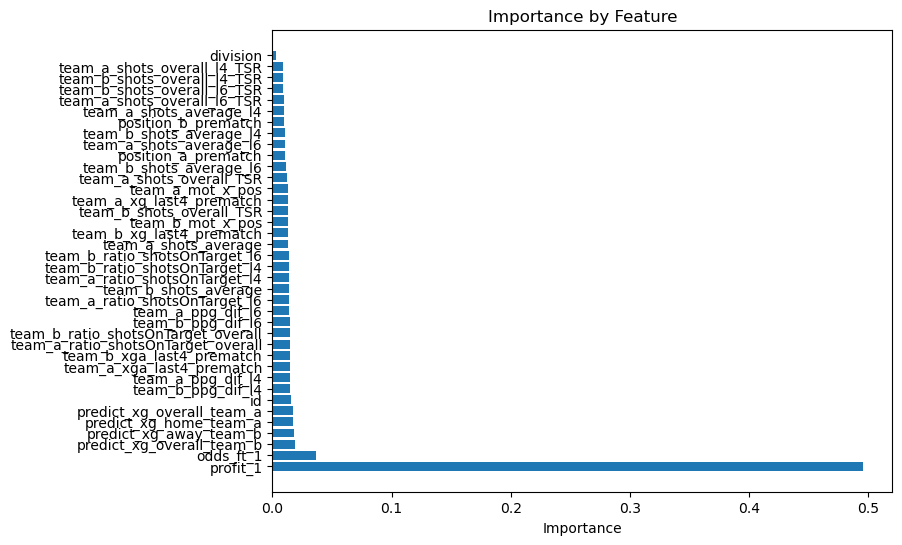

In [41]:
feature_importance = rf.feature_importances_ #importances for each feature saved by random forest
features = x_train.columns #features are columns from x
idxs = np.argsort(feature_importance)[::-1] #flip importance - most important first

#now plot features

plt.figure(figsize=(8,6))
plt.barh(range(len(features)), feature_importance[idxs], align='center')
plt.yticks(range(len(features)), np.array(features)[idxs])
plt.xlabel('Importance')
plt.title('Importance by Feature')
plt.show()

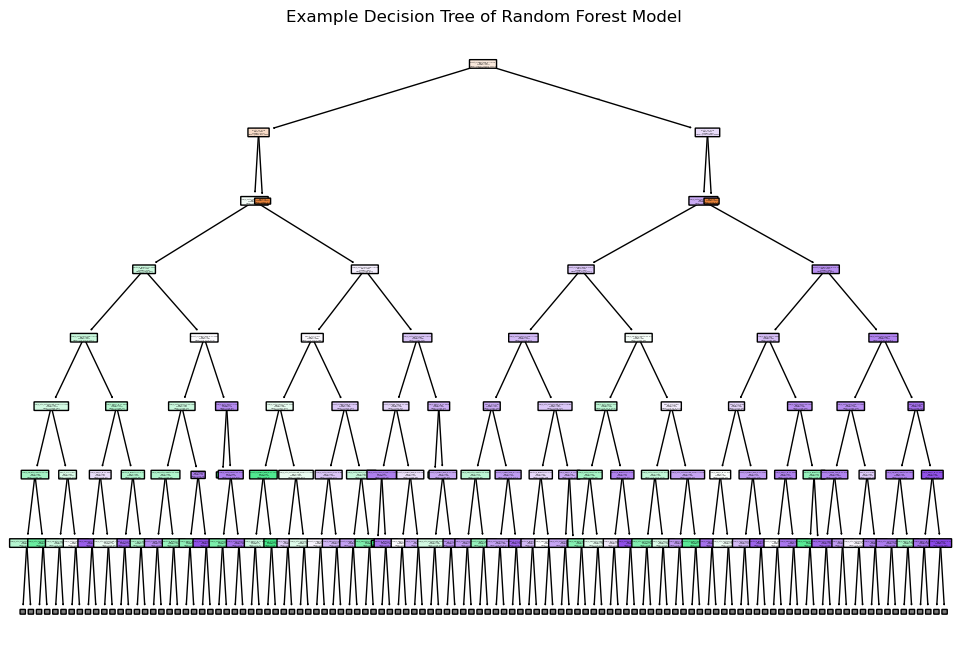

In [46]:
#visualizing a decision tree

plt.figure(figsize=(12,8)) 
plot_tree(rf.estimators_[0], filled=True, max_depth = 7, feature_names=features, class_names=['Class 0', 'Class 1', 'Class 2'], rounded=True)
#set max_depth, full tree was too large
plt.title('Example Decision Tree of Random Forest Model')
plt.show()

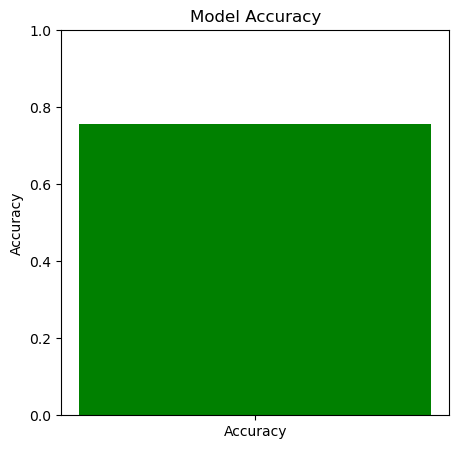

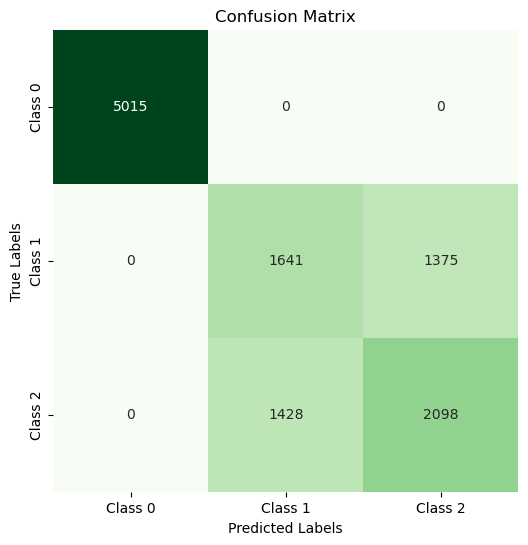

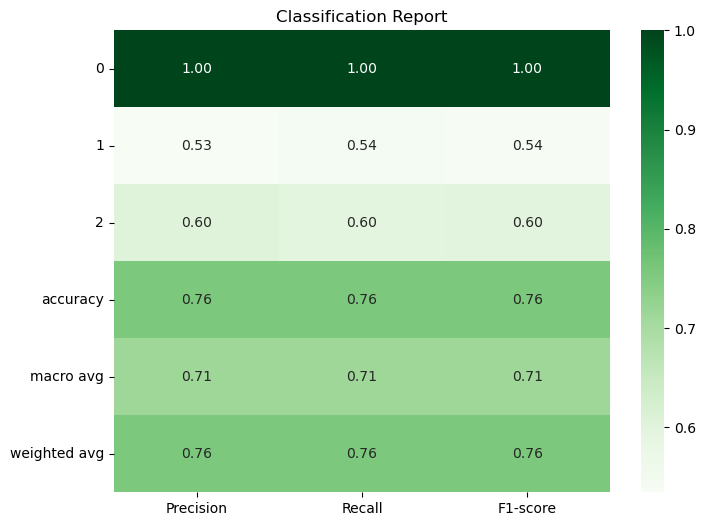

In [58]:
#accuracy
plt.figure(figsize=(5, 5))
plt.bar(['Accuracy'], [acc], color='Green')
plt.ylim(0, 1)
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.show()

#cm

plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', cbar=False, xticklabels=['Class 0', 'Class 1', 'Class 2'], yticklabels=['Class 0', 'Class 1', 'Class 2'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

#class report

# class_report = classification_report(preds, y_test, output_dict=True)
class_report_df = pd.DataFrame(class_report).transpose().iloc[:, :-1]

plt.figure(figsize=(8, 6))
sns.heatmap(class_report_df.astype(float), annot=True, cmap='Greens', cbar=True, fmt='.2f', 
            xticklabels=['Precision', 'Recall', 'F1-score'], yticklabels=class_report_df.index)
plt.title('Classification Report')
plt.show()

